# Parkinson Dataset

### 29 column; 1st subject id; 2-27 features; 28th output; 29th class info.
#### two data file: 1 for training and one for testing how? to get y_test

In [15]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing two Student Perfomance Dataset Dataset
dataset=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Parkinson Speech/data/train_data.txt",sep=",")
test_dataset=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Parkinson Speech/data/test_data.txt",sep=",")
test_data = pd.DataFrame(test_dataset)
data = pd.DataFrame(dataset)

In [16]:
# Check if dataset has null values
print("*******Training Dataset********")
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())
print("")
print("*******Testing Dataset********")
result = test_data.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

*******Training Dataset********
-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
1              0
1.488          0
0.000090213    0
0.9            0
0.794          0
2.699          0
8.334          0
0.779          0
4.517          0
4.609          0
6.802          0
13.551         0
0.905905       0
0.119116       0
11.13          0
166.533        0
164.781        0
10.421         0
142.229        0
187.576        0
160            0
159            0
0.006064725    0
0.000416276    0
0              0
0.1            0
0.2            0
23             0
1.1            0
dtype: int64

*******Testing Dataset********
-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
1              0
0.1350000      0
0.0000073      0
0.0670000      0
0.0780000      0
0.2020000      0
2.0330000      0
0.1780000      0
1.0740000      0
1.3360000    

In [17]:
X_train = data.iloc[:, 1:28].values
Y_train = data.iloc[:, 28].values
# X_testSet = test_data.iloc[:, 1:28].values
# print(test_dataset.shape)
print(dataset.shape)

(1039, 29)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 0)

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
# X_test = sc.transform(X_testSet)
X_test = sc.transform(X_test)

In [22]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressor']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam')]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 66.02613802249013
Accuracy for DecisionTreeRegressor: 100.0
Accuracy for RandomForestRegressor: 100.0
Accuracy for AdaBoostRegressor: 100.0
Accuracy for GaussianProcessRegressor: 57.05675715881331
Accuracy for LinearRegression: 57.590080508427974
Accuracy for MLPRegressor: 82.58019817147407


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Parkinson speech Dataset model accuracy')

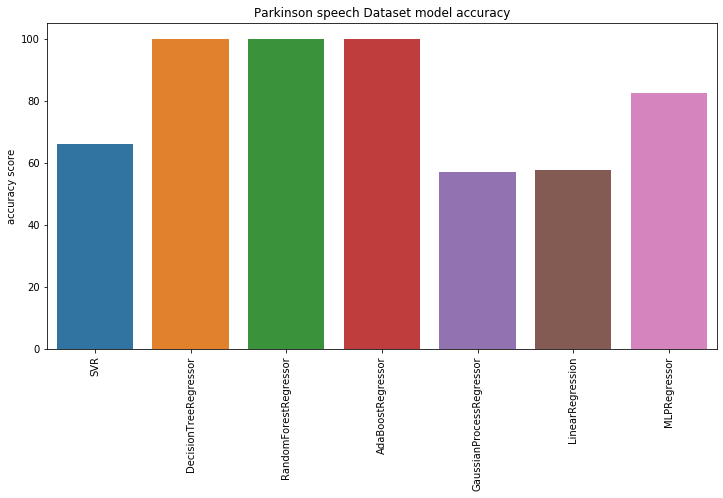

In [23]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Parkinson speech Dataset model accuracy')